# **Step 1: Reading & Exploring Data**

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC



nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data_path = 'E:\\FCIS\\4thyear\\2nd_Term\\Natural Language Processing\\Sentiment Analysis - Movie Reviews\\dataset'

positive_reviews = []
negative_reviews = []

for data_class in os.listdir(data_path):
  for review in os.listdir(os.path.join(data_path, data_class)):
    with open(os.path.join(data_path, data_class, review)) as f:
      review_content = f.read().replace('\n', '')

      if data_class == 'pos':
        positive_reviews.append(review_content)
      else:
        negative_reviews.append(review_content)

**Review Sample**

In [3]:
print('Positive Review Sample')
print(positive_reviews[0])
print()
print('Negative Review Sample')
print(negative_reviews[15])

Positive Review Sample
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don't dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . getting the hughes brothers to direct this

**Data Distribution**

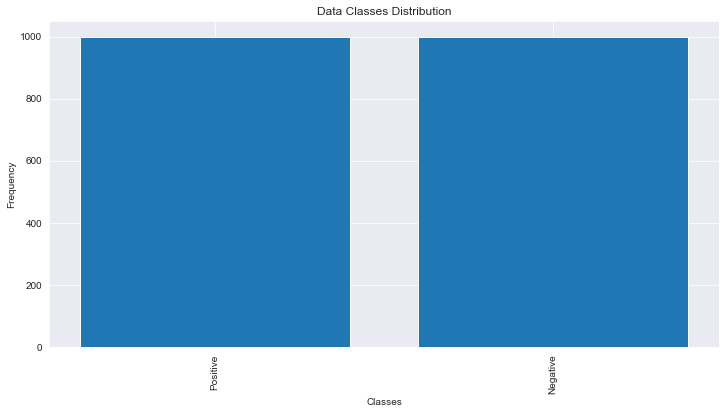

In [4]:
class_labels = ['Positive', 'Negative']
frequency = [len(positive_reviews), len(negative_reviews)]

fig = plt.figure(figsize=(12, 6))
plt.bar(class_labels, frequency)
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Data Classes Distribution')
plt.show()

**Review Words Count Distribution**

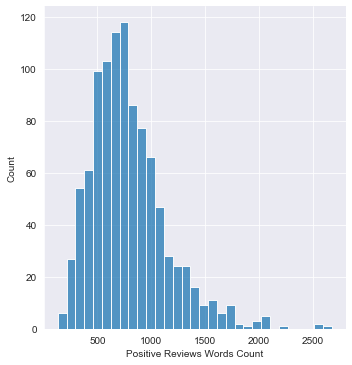

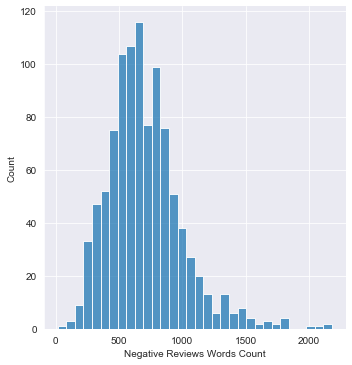

<Figure size 1152x576 with 0 Axes>

In [5]:
positive_reviews_words_count = []
negative_reviews_words_count = []


for i in range(len(positive_reviews)):
  positive_reviews_words_count.append(len(positive_reviews[i].split()))
  negative_reviews_words_count.append(len(negative_reviews[i].split()))


sns.displot(positive_reviews_words_count)
plt.xlabel("Positive Reviews Words Count")
sns.displot(negative_reviews_words_count)
plt.xlabel("Negative Reviews Words Count")


plt.figure(figsize=(16, 8))
plt.show()

# **Step 2: Preprocessing**

In [6]:
def tokenize_reviews(reviews):
  tokens = []
  for review in reviews:
   tokens.append(word_tokenize(review))
  return tokens

In [7]:
def remove_stop_words(reviews_tokens):
  tokens = []
  stop_words = set(stopwords.words('english'))
  for token in reviews_tokens:
    if token not in stop_words:
      tokens.append(token)
  return tokens

In [8]:
def lemmatize_tokens(reviews_tokens):
  tokens = []
  lemmatizer = WordNetLemmatizer()
  for token in reviews_tokens:
      tokens.append(lemmatizer.lemmatize(token))
  return tokens

In [9]:
def construct_review_string_from_tokens(tokens):
  return ' '.join(tokens)

In [10]:
def preProcess_Reviews(reviews):
  reviews = [re.sub(r"(?![\s])\W+", "", review) for review in reviews]
  reviews = tokenize_reviews(reviews)
  reviews = [lemmatize_tokens(review) for review in reviews]
  reviews = [remove_stop_words(review) for review in reviews]
  reviews = [construct_review_string_from_tokens(review) for review in reviews]
  return reviews

In [11]:
positive_reviews = preProcess_Reviews(positive_reviews)
negative_reviews = preProcess_Reviews(negative_reviews)

# **Step 3: Data Preparation** (make data frame)

In [12]:
Movies_reviews = positive_reviews + negative_reviews
reviews_classes = np.append(np.ones(1000, dtype=int), np.zeros(1000, dtype=int))

print(len(Movies_reviews))
print(len(reviews_classes))

data = {'reviews': Movies_reviews, 'sentiment': reviews_classes} # 1 for positive, 0 for negative
df = pd.DataFrame(data)
print(df)

2000
2000
                                                reviews  sentiment
0     film adapted comic book plenty success whether...          1
1     every movie come along suspect studio every in...          1
2     youve got mail work alot better deserves order...          1
3     jaw rare film grab attention show single image...          1
4     moviemaking lot like general manager nfl team ...          1
...                                                 ...        ...
1995  anything stigma taken warning releasing simila...          0
1996  john boormans zardoz goofy cinematic debacle f...          0
1997  kid hall acquired taste took least season watc...          0
1998  wa time john carpenter wa great horror directo...          0
1999  two party guy bob head haddaways dance hit lov...          0

[2000 rows x 2 columns]


# **Step 4: Feature Extraction**

splitting data (70% train, 30% test)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data['reviews'], data['sentiment'], test_size=0.3, shuffle=True)
X_train[0]

'fact good thriller action movie doesnt need violence good worth watching take potential violence make audience bite nail kind violence could efficient global thermonuclear war potential violence premiss wargames built upon computer whizkid david usually contended hacking school computer change grade read advertisment upcoming computer game want first play instead getting computer protovision software accidentally come frontgate norad help jennifer girl biology class start play nice game nuclear war wopr war operation plan response topnotch computer time hardly faster computer remember 12 watching cinema wa efficent giving scare day hasnt changed course nuclear war seemed much something could actually happen back 1983 wouldnt surprised gave people nightmare hope still doe since still hear school kid hacking computer pentagon broderick sheedy fine young teenager although interest david remains mystery rest actor fault restricted script play onedimensional grownup david parent kind paren

Method 1 : TF-IDF

In [14]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_train_tf = tf_idf.transform(X_train)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)


n_samples: 1400, n_features: 36960


In [15]:
X_test_tf = tf_idf.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 600, n_features: 36960


# **Step 5: Modeling**

**Model 1 : Naive Bayes Classifier**

In [16]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, Y_train)

y_pred = naive_bayes_classifier.predict(X_test_tf)

              precision    recall  f1-score   support

    Positive       0.91      0.67      0.77       320
    Negative       0.71      0.93      0.80       280

    accuracy                           0.79       600
   macro avg       0.81      0.80      0.79       600
weighted avg       0.82      0.79      0.79       600

Naive Bayes Classifier Accuracy:  0.79


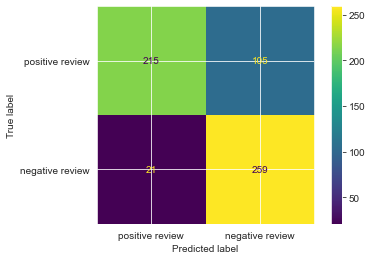

In [17]:
class_report = metrics.classification_report(Y_test, y_pred, target_names=['Positive', 'Negative'])
print(class_report)

matrix = confusion_matrix(Y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['positive review','negative review'])

disp.plot()

acc = metrics.accuracy_score(Y_test,y_pred)
print("Naive Bayes Classifier Accuracy: ", acc)

**Model 2 : Logistic Regression Classifier**

In [18]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train_tf, Y_train)

y_pred2 = logistic_classifier.predict(X_test_tf)

              precision    recall  f1-score   support

    Positive       0.90      0.79      0.84       320
    Negative       0.79      0.90      0.84       280

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

Logistic Regression Classifier Accuracy:  0.84


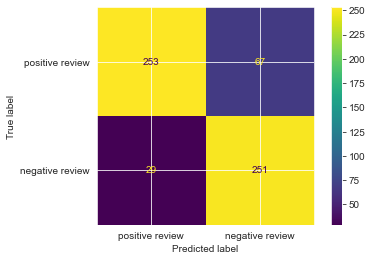

In [19]:
class_report2 = metrics.classification_report(Y_test, y_pred2, target_names=['Positive', 'Negative'])
print(class_report2)

matrix2 = confusion_matrix(Y_test,y_pred2)

disp2 = ConfusionMatrixDisplay(confusion_matrix=matrix2,
                               display_labels=['positive review','negative review'])

disp2.plot()

acc2 = metrics.accuracy_score(Y_test,y_pred2)
print("Logistic Regression Classifier Accuracy: ", acc2)

**Model 3 : SVM**

In [20]:
svm_classifier = SVC()
svm_classifier.fit(X_train_tf, Y_train)

y_pred3 = svm_classifier.predict(X_test_tf)

              precision    recall  f1-score   support

    Positive       0.87      0.80      0.83       320
    Negative       0.79      0.86      0.82       280

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

SVM Classifier Accuracy:  0.8266666666666667


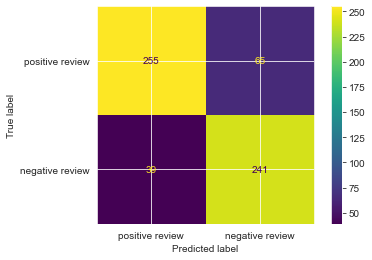

In [21]:
class_report3 = metrics.classification_report(Y_test, y_pred3, target_names=['Positive', 'Negative'])
print(class_report3)

matrix3 = confusion_matrix(Y_test,y_pred3)

disp3 = ConfusionMatrixDisplay(confusion_matrix=matrix3,
                               display_labels=['positive review','negative review'])

disp3.plot()

acc3 = metrics.accuracy_score(Y_test,y_pred3)
print("SVM Classifier Accuracy: ", acc3)

**Accuracy Summary**

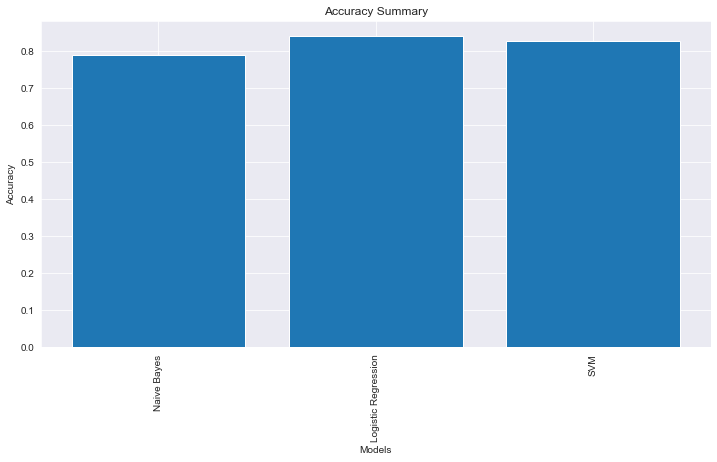

In [22]:
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [acc, acc2, acc3]

fig = plt.figure(figsize=(12, 6))
plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation = 90)
plt.title('Accuracy Summary')
plt.show()